In [1]:
import xarray as xr

a=xr.open_dataset('/work/aa0238/a271093/data/ERA5/1979-2023/ICON_remapped_3x/IVTu/IVTu_1989010100-1989123123_remapped_3x.ncz')

/work/aa0238/a271093/Conda/MOAAP_env/lib/python3.12/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'scipy', 'gini']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

In [9]:
c=C(3)
c.y =5
c.y

for i,season_ in enumerate(Season):

    #dat=IVTobj_ls.sel_season(season=Season.WINTER).get_attributes(attr='duration')##obj_means("size")
    dat1=IVTobj_ls.sel_season(season=season_).get_attributes(attr='duration')##obj_means("size")
    dat2=IVTobj_ls.sel_season(season=season_).obj_means(attr='size')##obj_means("size")


    sns.kdeplot(x=np.array(dat1),y=np.array(dat2),label=season_.name,color=bar_colors[i],shade=True,bw_adjust=0.3, clip =((0,80),(0,0.5e5)))
    #sns.histplot(dat,label=season_.name,color=bar_colors[i],bins=100, stat='density')

    

ax.set_xlabel('Object duration [hrs]')
ax.set_ylabel('Probability density')
plt.legend()
plt.grid()
ax.set_xlim(0,200)

In [14]:
from src.GridPoints import *

x= RegularGridPoint(3,4)
x

RegularGridPoint(lat=3, lon=4)

/tmp/ipykernel_3696960/3635372108.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=np.array(dat1),y=np.array(dat2),label=season_.name,color=bar_colors[i],shade=True,bw_adjust=0.3, clip =((9,80),(0,0.5e5)))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.0, 200.0)

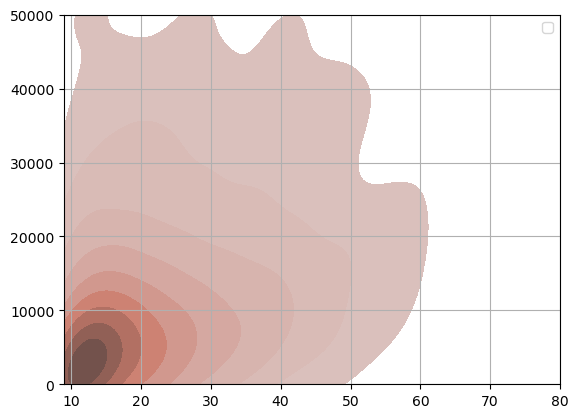

In [137]:

dat1=IVTobj_ls.sel_season(season=Season.WINTER).get_attributes(attr='duration')##obj_means("size")
dat2=IVTobj_ls.sel_season(season=Season.WINTER).obj_means(attr='total_IVT')##obj_means("size")


sns.kdeplot(x=np.array(dat1),y=np.array(dat2),label=season_.name,color=bar_colors[i],shade=True,bw_adjust=0.3, clip =((9,80),(0,0.5e5)))
    #sns.histplot(dat,label=season_.name,color=bar_colors[i],bins=100, stat='density')

    

ax.set_xlabel('Object duration [hrs]')
ax.set_ylabel('Probability density')
plt.legend()
plt.grid()
ax.set_xlim(0,200)

In [138]:
dat1=IVTobj_ls.sel_season(season=Season.SUMMER).get_attributes(attr='duration')##obj_means("size")
dat2=IVTobj_ls.sel_season(season=Season.SUMMER).obj_means(attr='total_IVT')##obj_means("size")


sns.kdeplot(x=np.array(dat1),y=np.array(dat2),label=season_.name,color=bar_colors[i],shade=True,bw_adjust=0.3, clip =((9,80),(0,0.5e5)))
    #sns.histplot(dat,label=season_.name,color=bar_colors[i],bins=100, stat='density')

    

ax.set_xlabel('Object duration [hrs]')
ax.set_ylabel('Probability density')
plt.legend()
plt.grid()
ax.set_xlim(0,200)

In [1]:
%load_ext autoreload
%autoreload 2
from src.GridPoints import *
    

/work/aa0238/a271093/Conda/MOAAP_env/lib/python3.12/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
p1= GridPoint(0,1)

TypeError: Can only create Regular-or Rotated Gridpoint objects, no objects of the GridPoint parent class.

In [3]:
p1

GridPoint(lat=0, lon=1)

In [4]:
p2= GridPoint(0,1)

<class 'src.GridPoints.GridPoint'>


In [5]:
id(p1), id(p2)

(140737077784304, 140737077784304)

In [6]:
p3= GridPoint(0,4)

<class 'src.GridPoints.GridPoint'>


In [7]:
id(p3)

140728213598656

In [3]:
reg1 = RegularGridPoint(0,1)
rot1 = RotatedGridPoint(0,1)
rot2 = RotatedGridPoint(0,1)
rot3 = RotatedGridPoint(1,1)

In [4]:
id(reg1), id (rot1)

(140737019942896, 140737019940640)

In [5]:
RegularGridPoint.__dict__

mappingproxy({'__module__': 'src.GridPoints',
              '__doc__': '\n    Class that represents grid points in a regular lon-lat coordinate system.\n    ',
              '_instances': {(0, 1): RegularGridPoint(lat=0, lon=1)},
              '__init__': <function src.GridPoints.RegularGridPoint.__init__(self, lat, lon)>,
              'to_rotated': <function src.GridPoints.RegularGridPoint.to_rotated(self) -> 'RotatedGridPoint'>})

In [6]:
RotatedGridPoint.__dict__

mappingproxy({'__module__': 'src.GridPoints',
              '__doc__': '\n    Class that represents grid points in a rotated coordinate system.\n    ',
              '_instances': {(0, 1): RotatedGridPoint(lat=0, lon=1),
               (1, 1): RotatedGridPoint(lat=1, lon=1)},
              'to_regular': <function src.GridPoints.RotatedGridPoint.to_regular(self) -> 'RegularGridPoint'>})

In [13]:
from abc import ABC
class test(ABC):
    pass

t= test()

In [14]:
t